<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Pré-processamento de Imagens
---

## Introdução ao Pré-processamento de Imagens

- As imagens consistuem um tipo de dado complexo
- Em imagens em escala de cinza, cada píxel (ponto da imagem) é representado por um valor entre 0 e 1, ou as vezes entre 0 e 255, onde o menor valor é preto e o maior valor é branco.
- Em imagens coloridas, cada píxel é representado por três valores das componentes R, G e B, que variam de 0 a 1 ou de 0 a 255.
- É fundamental entender a estrutura das imagens, em termos do formato de dados, já que se trata de um dado multidimensional.

## Conjuntos de Dados

Os seguintes conjuntos de dados estão disponíveis na biblioteca `torchvision` e são muito utilizados para aprender a fazer processamentos em imagens.

- MNIST
- Fashion-MNIST
- CIFAR
- SVHN
- PhotoTour
- Flickr

### MNIST handwritten digit database

In [1]:
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
data = datasets.MNIST(root='data',train=True,download=True,transform=transform)

# prepare data loaders
batch_size = 10
loader = DataLoader(data, batch_size=batch_size)

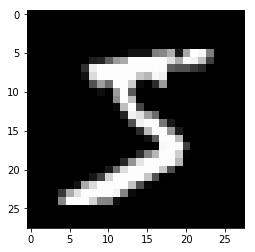

In [32]:
images, labels = iter(loader).next()
labels = labels.numpy()
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.squeeze(images[0]), cmap='gray')

In [33]:
def show_images(images, labels = None, n_rows = 1, figsize=(25, 10) ):
    fig = plt.figure(figsize=figsize)
    n_images = len(images)
    for idx in range(n_images):
        ax = fig.add_subplot(n_rows, np.ceil(n_images/n_rows), idx+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images[idx]), cmap='gray')
        if (labels is not None):
            ax.set_title(str(labels[idx]))
            ax.title.set_fontsize(16)

Visualizando um batch de tamanho de 10 dos números da base de dados.

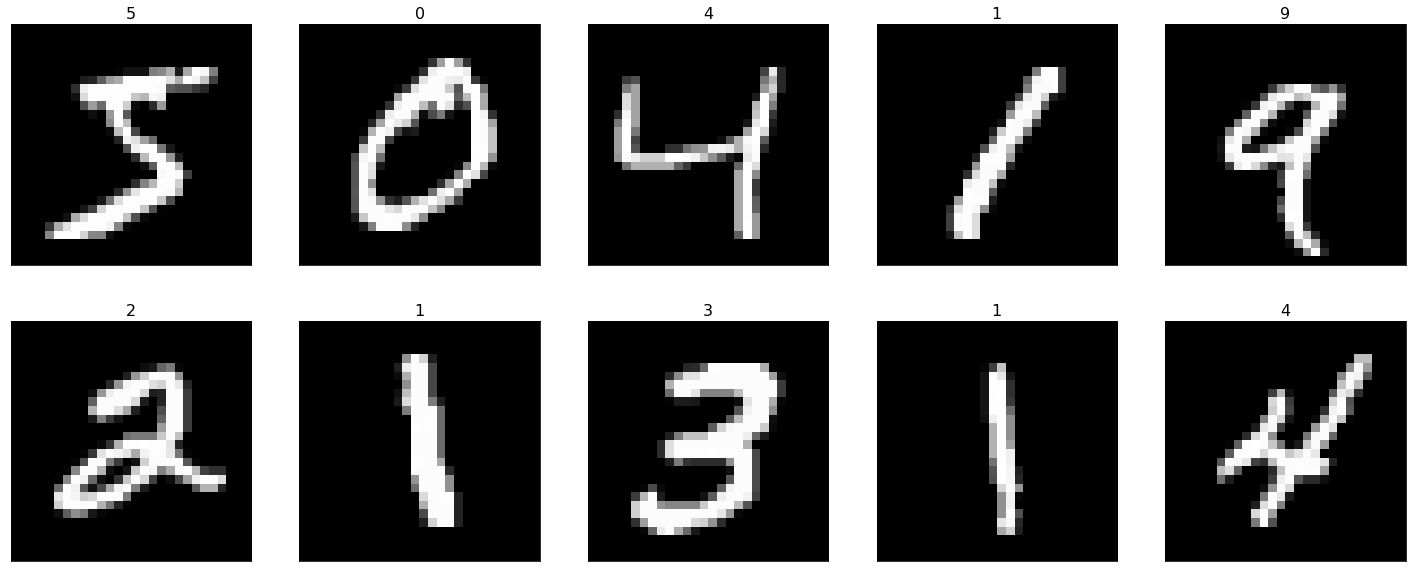

In [34]:
from helper import show_images
show_images(images,labels,n_rows=2)

### Formato de Imagens em Escala de Cinza

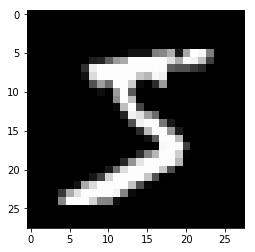

In [36]:
plt.imshow(np.squeeze(images[0]), cmap='gray')

In [41]:
images[0].shape

torch.Size([1, 28, 28])

In [42]:
np.squeeze(images[0]).shape

torch.Size([28, 28])

In [43]:
def show_image_in_details(img, fig_size = (12,12)):
    fig = plt.figure(figsize=fig_size) 
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    ax.set_aspect('auto')
    img = img.numpy()
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = np.round(img[x][y],2) if img[x][y] != 0 else 0
            ax.annotate(str(val), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',                        
                        color='white' if img[x][y]<thresh else 'black')

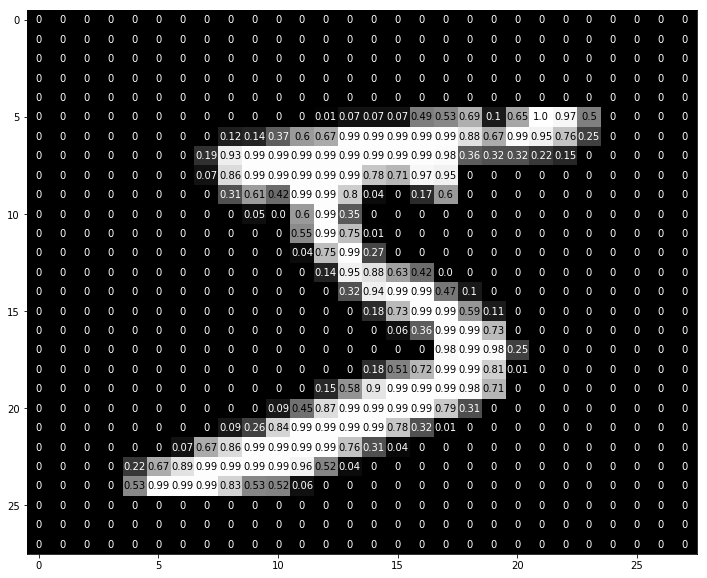

In [44]:
show_image_in_details(np.squeeze(images[0]), (12,10) )

### FashionMNIST - Zalando's article image dataset

In [45]:
# choose the training and test datasets
data = datasets.FashionMNIST(root='data',train=True,download=True,transform=transform)
classes = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal',
           'Shirt','Sneaker','Bag', 'Ankle boot']

# prepare data loaders
batch_size = 10
loader = DataLoader(data, batch_size=batch_size)

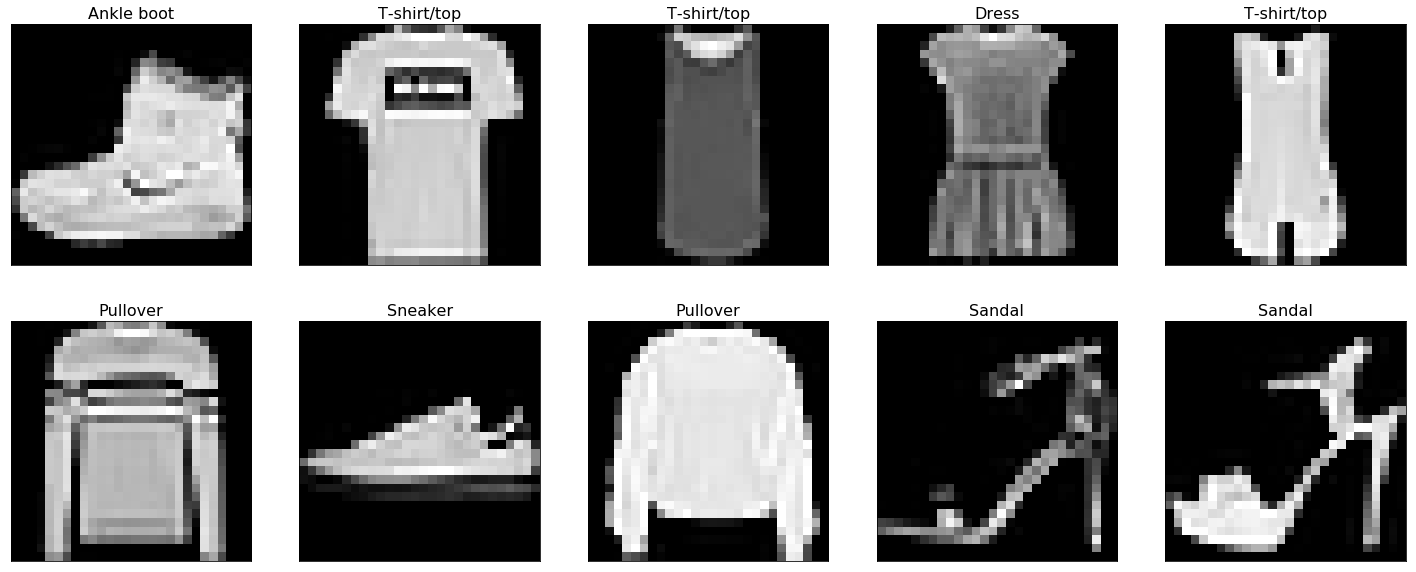

In [46]:
images, labels = iter(loader).next()
labels = [classes[label] for label in labels]
show_images(images,labels,n_rows=2)

### CIFAR-10 - 80 million tiny images dataset

In [50]:
transform = transforms.Compose([
    transforms.ToTensor()    
    ])

# choose the training and test datasets
data = datasets.CIFAR10(root='data',download=True,transform=transform)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# prepare data loaders
batch_size = 10
loader = DataLoader(data, batch_size=batch_size)

Files already downloaded and verified


In [51]:
images, labels = iter(loader).next()
images = images.numpy()
labels = [classes[label] for label in labels]

In [52]:
def show_images_rgb(images, labels = None, n_rows = 1, figsize=(25, 10) ):
    fig = plt.figure(figsize=figsize)
    n_images = len(images)
    for idx in range(n_images):
        ax = fig.add_subplot(n_rows, np.ceil(n_images/n_rows), idx+1, xticks=[], yticks=[])
        image_transposed = np.transpose(images[idx], (1,2,0) )
        ax.imshow( image_transposed )
        if (labels is not None):
            ax.set_title(str(labels[idx]))
            ax.title.set_fontsize(16)

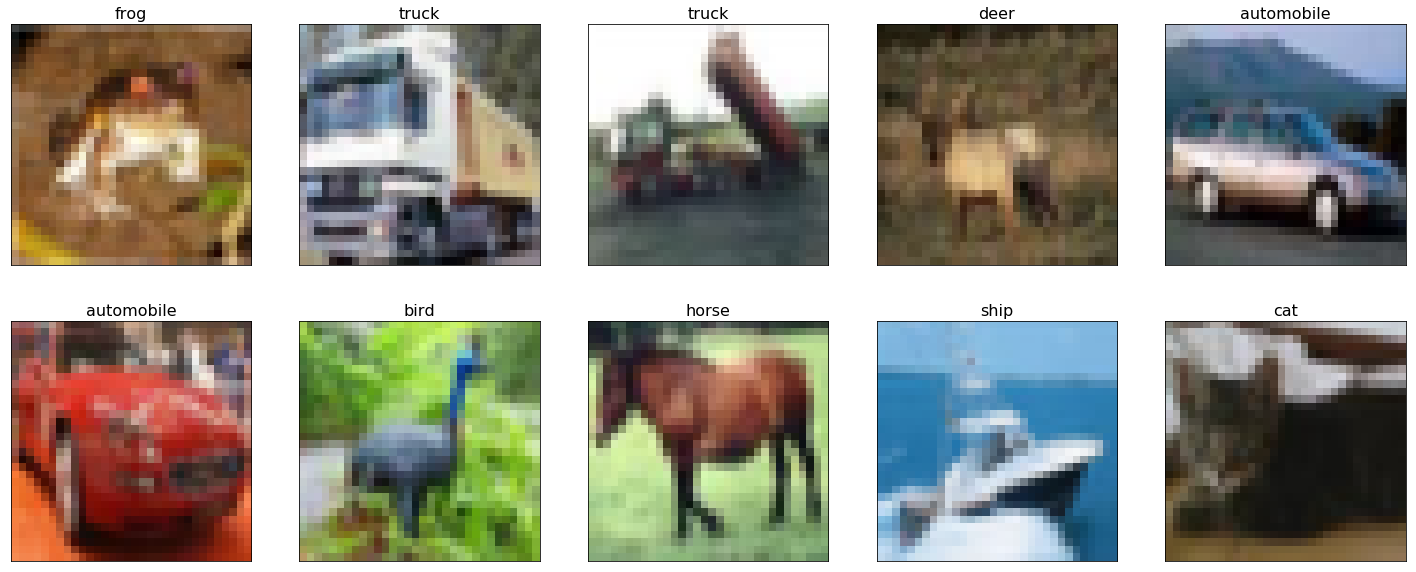

In [53]:
show_images_rgb(images, labels, n_rows = 2)

### Formato de Imagens em RGB

In [54]:
images.shape

(10, 3, 32, 32)

In [55]:
images[0].shape

(3, 32, 32)

In [60]:
images[0][0]

array([[0.23137255, 0.16862746, 0.19607843, ..., 0.61960787, 0.59607846,
        0.5803922 ],
       [0.0627451 , 0.        , 0.07058824, ..., 0.48235294, 0.46666667,
        0.47843137],
       [0.09803922, 0.0627451 , 0.19215687, ..., 0.4627451 , 0.47058824,
        0.42745098],
       ...,
       [0.8156863 , 0.7882353 , 0.7764706 , ..., 0.627451  , 0.21960784,
        0.20784314],
       [0.7058824 , 0.6784314 , 0.7294118 , ..., 0.72156864, 0.38039216,
        0.3254902 ],
       [0.69411767, 0.65882355, 0.7019608 , ..., 0.84705883, 0.5921569 ,
        0.48235294]], dtype=float32)

In [61]:
images[0][1]

array([[0.24313726, 0.18039216, 0.1882353 , ..., 0.5176471 , 0.49019608,
        0.4862745 ],
       [0.07843138, 0.        , 0.03137255, ..., 0.34509805, 0.3254902 ,
        0.34117648],
       [0.09411765, 0.02745098, 0.10588235, ..., 0.32941177, 0.32941177,
        0.28627452],
       ...,
       [0.6666667 , 0.6       , 0.6313726 , ..., 0.52156866, 0.12156863,
        0.13333334],
       [0.54509807, 0.48235294, 0.5647059 , ..., 0.5803922 , 0.24313726,
        0.20784314],
       [0.5647059 , 0.5058824 , 0.5568628 , ..., 0.72156864, 0.4627451 ,
        0.36078432]], dtype=float32)

In [62]:
images[0][2]

array([[0.24705882, 0.1764706 , 0.16862746, ..., 0.42352942, 0.4       ,
        0.40392157],
       [0.07843138, 0.        , 0.        , ..., 0.21568628, 0.19607843,
        0.22352941],
       [0.08235294, 0.        , 0.03137255, ..., 0.19607843, 0.19607843,
        0.16470589],
       ...,
       [0.3764706 , 0.13333334, 0.10196079, ..., 0.27450982, 0.02745098,
        0.07843138],
       [0.3764706 , 0.16470589, 0.11764706, ..., 0.36862746, 0.13333334,
        0.13333334],
       [0.45490196, 0.36862746, 0.34117648, ..., 0.54901963, 0.32941177,
        0.28235295]], dtype=float32)

- No formato original uma imagem consiste de três camadas, onde cada camada é um array bi-dimensional. 
- Para analisar os dados isso é Ok. Mas para visualizar, como vimos anteriormente, precisamos representar cada pixel da imagem pelos três valores. Assim vamos fazer a transposição das dimensões.

In [56]:
np.transpose(images[0], (1,2,0) ).shape

(32, 32, 3)

## Operações de Pré-processamento

### Transformação para Escala de Cinza

In [ ]:
new_transform = transforms.Compose([    
    transforms.Grayscale(),
    transforms.ToTensor(),
    ])

data = datasets.CIFAR10(root='data',download=True, transform=new_transform)
batch_size = 20
loader = DataLoader(data, batch_size=batch_size)
images, labels = iter(loader).next()
labels = [classes[label] for label in labels]

Após uma transformação em escala de cinza, passamos de ter três dimensões para cada píxel para apenas uma dimensão.

In [ ]:
images.shape

In [ ]:
show_images(images, labels, n_rows = 3)

### Rotação Randômica

In [ ]:
new_transform = transforms.Compose([    
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    ])

data = datasets.CIFAR10(root='data',download=True, transform=new_transform)
batch_size = 20
loader = DataLoader(data, batch_size=batch_size)
images, labels = iter(loader).next()
labels = [classes[label] for label in labels]

In [ ]:
show_images_rgb(images, labels, n_rows = 3)

### Redimensionamento

In [ ]:
new_transform = transforms.Compose([    
    transforms.Resize((20,32)),
    transforms.ToTensor(),
    ])

data = datasets.CIFAR10(root='data',download=True, transform=new_transform)
batch_size = 20
loader = DataLoader(data, batch_size=batch_size)
images, labels = iter(loader).next()
labels = [classes[label] for label in labels]

In [ ]:
show_images_rgb(images, labels, n_rows = 3)

### Random Crop

In [ ]:
new_transform = transforms.Compose([    
    transforms.RandomCrop(24),    
    transforms.ToTensor(),
    ])

data = datasets.CIFAR10(root='data',download=True, transform=new_transform)
batch_size = 20
loader = DataLoader(data, batch_size=batch_size)
images, labels = iter(loader).next()
labels = [classes[label] for label in labels]

In [ ]:
show_images_rgb(images, labels, n_rows = 3)

### Combinando Operações

In [ ]:
new_transform = transforms.Compose([    
    transforms.RandomRotation(20),
    transforms.CenterCrop(24),    
    transforms.Grayscale(),
    transforms.ToTensor(),
    ])

data = datasets.CIFAR10(root='data',download=True, transform=new_transform)
batch_size = 20
loader = DataLoader(data, batch_size=batch_size)
images, labels = iter(loader).next()
labels = [classes[label] for label in labels]

In [ ]:
show_images(images, labels, n_rows = 3)

### Atividades

1. Pesquisar pela função ImageFolder que permite carregar um conjunto de imagens a partir de um diretório
2. Pesquisar como obter imagens de Notredame no conjunto de dados PhotoTour.
3. Com essas fotos construir um dataloader e fazer os seguintes processamentos:
    1. Grayscale
    2. CenterCrop
    3. RandomRotation(15) + CenterCrop + Grayscale
    4. RandomVerticalFlip + RandomHorizontalFlip
    5. transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2) 
4. Pesquisar as funcionalidades da biblioteca  `scikit-image` para pré-processamento de imagens. Link: https://scikit-image.org/docs/stable/auto_examples/
5. Aplicar esses processamentos no conjunto de dados de PhotoTour.

In [ ]:
#new_transform = transforms.Compose([    
#    transforms.Resize((20,32)),
#    transforms.ToTensor(),
#    ])

#data = datasets.PhotoTour(root='data',name='notredame',download=False, transform=new_transform)
#batch_size = 20
#loader = DataLoader(data, batch_size=batch_size)
#images, labels = iter(loader).next()
#labels = [classes[label] for label in labels]